In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%load_ext tikzmagic

import scipy.integrate

from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['animation.writer'] = 'avconv'

# Exemplos de Convolução e a Integral da Convolução

A operação **convolução** de dois sinais é uma operação fundamental no processamento de sinais. Principalmente, porque a saída de qualquer sistema linear invariante no tempo (SLIT) é dada pela convolução de sua resposta ao impulso com o sinal de entrada. Outra importante aplicação da convolução é o [teorema da convolução](http://dspillustrations.com/pages/posts/misc/the-convolution-theorem-and-application-examples.html), o qual afirma que a multiplicação de dois sinais no dominio do tempo corresponde à convolução no domínio da frequência desses mesmos sinais e vice-versa.

Nós ilustraremos a operação da convolução e como podemos calculá-la numericamente. Formalmente, a convolução $s_1(t)*s_2(t)$ de dois sinais, $s_1(t)$ e $s_2(t)$, é definida pela integral da convolução:

$$s_1(t)*s_2(t) = \int_{-\infty}^{\infty}s_1(\tau)s_2(t-\tau)d\tau= \int_{-\infty}^{\infty}s_2(\tau)s_1(t-\tau)d\tau$$

A convolução de dois sinais contínuos é a integral do produto dos sinais, onde um dos sinais é deslocado e rebatido temporalmente. Vamos calcular a convolução dos sinais, $s_1(t)$ e $s_2(t)$:


In [5]:
s1 = lambda t: np.maximum(0, 1-abs(t))        # sinal 1: triangular bilateral
s2 = lambda t: (t>0) * np.exp(-2*t)           # sinal 2: impulso exponencial lateral direito

Vamos plotar esses dois sinais para ver a aparência deles:

In [6]:
Fs = 50                                       # frequencia de amostragem para o traçado dos sinais
T = 5                                         # a faixa de tempo usada na criação dos dois sinais
t = np.arange(-T, T, 1./Fs)                   # base de tempo

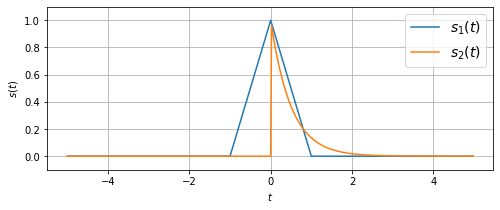

In [7]:
plt.figure(figsize=(8,3))
plt.plot(t, s1(t), label='$s_1(t)$')
plt.plot(t, s2(t), label='$s_2(t)$')
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=14); plt.ylim((-0.1, 1.1));

Agora vamos avaliar a integral da convolução num determinado tempo, $t_0=1$ s:

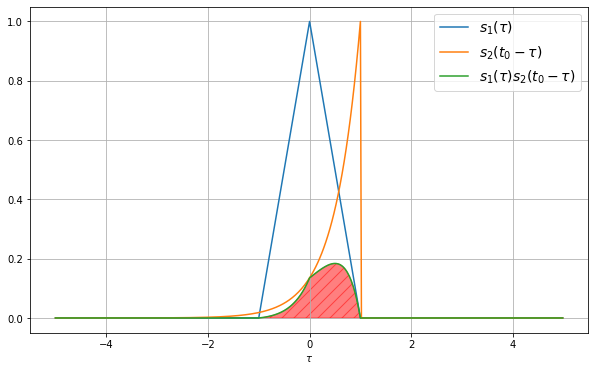

In [8]:
t0 = 1
rebatido = lambda tau: s2(t0 - tau)
produto  = lambda tau: s1(tau) * s2(t0 - tau)

plt.figure(figsize=(10,6))
plt.gca().set_ymargin(0.05);
plt.plot(t, s1(t), label=r'$s_1(\tau)$')
plt.plot(t, rebatido(t), label=r'$s_2(t_0-\tau)$')
plt.plot(t, produto(t), label=r'$s_1(\tau)s_2(t_0-\tau)$')
plt.fill(t, produto(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$'); plt.legend(fontsize=14);

# calcula a integral, usando a regra de integração de Simpson
display(HTML(u"Resultado da convolução (area sombreada em vermelho): $(s_1*s_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(produto(t), t))))

Como podemos ver, o sinal de traço verde, $s_2(t_0-\tau)$, foi rebatido em relação ao eixo vertical e depois foi deslocado por $t_0$ para direita (atraso). O valor da integral da convolução corresponde à área sombreada em vermelho. 

Vamos agora escrever uma pequena função para mostrar o resultado da integral da convolução para diferentes deslocamentos de tempo...

In [11]:
def mostraConvolucao(s1, s2, t0):
    # Calcula o resultado da integral da convolução usando a regra de integração de Simpson
    convolucao = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * s2(t_ - tau)
        convolucao[n] = scipy.integrate.simps(prod(t), t)
    
    # Cria o sinal rebatido e deslocado no tempo
    s_reb = lambda t: s2(t0 - t)
    prod  = lambda tau: s1(tau) * s2(t0 - tau)

    # Plota os sinais
    plt.gcf().clear()
    plt.subplot(211); plt.gca().set_ymargin(0.05)
    plt.plot(t, s1(t), label=r'$s_1(\tau)$')
    plt.plot(t, s_reb(t), label=r'$s_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$s_1(\tau)s_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(fontsize=14)
    plt.text(-4, 0.6, '$t_0\;=\;%.2f$' % t0, bbox=dict(fc='white'))
    
    # Plota a convolução
    plt.subplot(212); plt.gca().set_ymargin(0.05)
    plt.plot(t, convolucao, label='$s_1(t)*s_2(t)$')
    
    # recalcula o valor da integral da convolução no presente deslocamento temporal t0
    valor_pres = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, valor_pres, 'ro')    # plota o ponto
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$s_1(t)*s_2(t)$'); plt.legend(fontsize=12)
    #plt.show()

In [12]:
plt.figure()
interact(lambda t0: mostraConvolucao(f1, f2, t0), t0 = (-2,3,0.05));

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

A animação mostra, como o sinal verde é gradualmente deslocado para a direita, produzindo mais e mais sobreposição entre ambos sinais e portanto aumentando a área sob seu produto. Então, quando o sinal verde é deslocado ainda mais para a direita, nós vemos que a área sob seu produto diminui novamente.

Outra importante propriedade pode ser vista a partir da saída da convolução: embora o sinal de entrada (verde) tenha um salto abrupto em $t=0$, a convolução de ambos sinais é um sinal suave na saída. Essa propriedade se deve à integral no cálculo da convolução: a integral de alguma forma cria um filtro de média móvel, que não pode criar saltos imediatos no sinal de saída (desde que a entrada não contenha impulsos unitários - delta de Dirac). De modo que uma propriedade geral da convolução, é o fato que o resultado da convolução do produto de dois sinais é sempre um sinal mais suave que o sinal de entrada.

Vamos ver um exemplo clássico para explicação da convolução: a convolução de um sinal retangular com ele próprio.
O resultado é um sinal triangular com um valor de pico ocorrendo quando ambos os retângulo se sobrepõem perfeitamente.

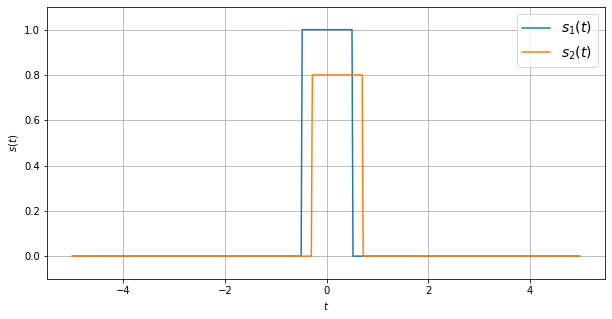

In [13]:
s1 = lambda t: (abs(t)<0.5).astype(float)
s2 = lambda t: 0.8*(abs(t-0.2)<0.5).astype(float)
plt.figure(figsize=(10,5))
plt.plot(t, s1(t), label='$s_1(t)$')
plt.plot(t, s2(t), label='$s_2(t)$')
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=14); plt.ylim((-0.1, 1.1));

In [15]:
interact(lambda t0: mostraConvolucao(s1, s2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

Vamos finalmente ver a convolução de um impulso com decaimento exponencial com um sinal senoidal chaveado. Se entendermos o sinal azul como a resposta ao impulso de um SLIT e o sinal verde como seu sinal de entrada, então a convolução de ambos é a saída do SLIT para essa particular entrada (senóide chaveada).

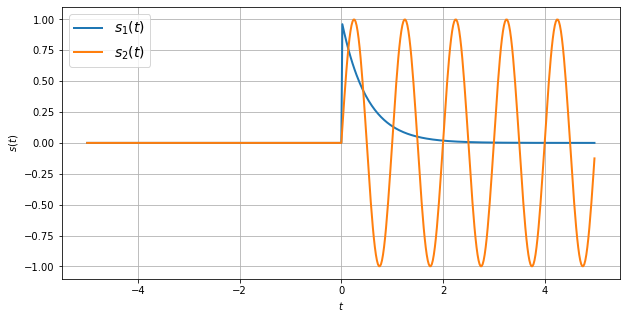

In [16]:
s1 = lambda t: (t>0) * np.exp(-2*t)
s2 = lambda t: np.sin(2*np.pi*t) * (t>0)
plt.figure(figsize=(10,5))
plt.plot(t, s1(t), label='$s_1(t)$', linewidth=2)
plt.plot(t, s2(t), label='$s_2(t)$', linewidth=2)
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=14); plt.ylim((-1.1, 1.1));

Vimos que a resposta ao impulso (azul) é um sinal causal, ou seja $s_1(t)=0, t<0$. Como a senóide é chaveada em $t=0$, a saída do sistema é nula para tempos antes do chaveamento. Então, depois de alguma fase transitória, a saída do sistema torna-se uma senóide com a mesma frequência mas com fase e amplitude diferentes. Esta é uma propriedade fundamental dos SLIT's: a resposta de um SLIT a um harmônico (senóide de freq. múltipla da freq. furndamental) é um harmônico de mesma frequência, mas (possivelmente) com fase e amplitude diferentes. Podemos dizer também que **harmônicos são auto-funções dos SLIT's**.  Portanto, em particular, harmônicos sao auto-funções da integral de convolução.

In [17]:
interact(lambda t0: mostraConvolucao(s1, s2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

## Conclusão
> - A operação de convolução é dada pela integral sobre o produto de dois sinais, onde um sinal é rebatido e deslocado no tempo.
> - A operação de convolução suaviza os sinais de entrada, ou seja, a saída da convolução é um sinal mais suave do que se apresenta a entrada (para a resposta ao impulso sendo um impulso com decaimento exponencial).
> - Sinais harmônicos (seno, cosseno) são as auto-funções da operação da convolução. Isto significa que ao convoluir um seno com algum outro sinal produzirá outro seno de mesma frequência mas de amplitude e fase diferentes.